# Part 2: Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data_cleaned_filename = "cleaned_adult.csv" # file after invalid data has been cleaned
adults = pd.read_csv(data_cleaned_filename)

In [3]:
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,native-country,income
0,50,Self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,Before HS,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,<=50K
4,37,Private,284582,Post-Grad,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,Before HS,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Non-US,<=50K
6,52,Self-emp,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Post-Grad,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# Function to draw chart for Category Variables
def fig_category(dt, column_name, xlabel, ylabel):
    dt_count = dt[column_name].value_counts()
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    sb.barplot( dt_count.values,dt_count.index, alpha=0.8)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title("Bar Chart of " + str(column_name))
    plt.subplot(1,2,2)
    dt_count.plot(kind='pie', autopct = '%.2f')
    plt.title('Percentage of ' + str(column_name))
    plt.ylabel('')
    plt.show()

In [5]:
# Function to draw chart for Numeric Variable
def fig_numeric(dt, col_name):
    plt.figure(figsize=(20,8))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    plt.hist(dt[col_name])
    plt.title("Histogram of "+ str(col_name).upper())
    plt.xlabel(col_name.upper())
    plt.ylabel('Frequency')
    plt.subplot(1,2,2)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    #plt.boxplot(adults['age'], column='age',by='income')
    sb.boxplot(y= col_name,data=adults)
    plt.title("Boxplot Chart of " + str(col_name).upper())
    plt.ylabel(col_name.upper())

In [6]:
# Function to draw charts which show the relationship between Numeric Variables with Income group
def fig_numericVsIncome(dt, col_name, dtIncomeLarge50, dtIncomeLess50):
    # Create figure
    plt.figure(figsize=(25,6))
    # create the first of three panels and set current axis
    plt.subplot(1,3,1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    sb.boxplot(x='income',y=col_name,data=adults,hue='income')
    plt.title("BOXPLOT CHAT OF " + str(col_name).upper()+ " IN GROUP OF INCOME")
    plt.ylabel(col_name.upper())
    plt.subplot(1, 3, 2) # (rows, columns, panel number)
    plt.hist(dtIncomeLarge50[col_name])
    plt.legend(["income>50"])
    plt.xlabel(col_name.upper())
    plt.ylabel('Frequency')
    plt.title("HISTOGRAM OF "+ str(col_name).upper()+ "-with INCOME >50K")
    plt.subplot(1,3,3)
    plt.hist(dtIncomeLess50[col_name], color=["red"])
    labels = ["income<=50"]
    plt.legend(labels)
    plt.xlabel(col_name.upper())
    plt.ylabel('Frequency')
    plt.title("HISTOGRAM OF "+ str(col_name).upper()+ "with INCOME <=50K")

In [7]:
# Function draws bar chart for Category variable regard to Income target
def fig_categoryVsIncome_barV(dt, col_name):
    plt.figure(figsize=(10,8))
    sb.countplot(x=col_name, hue="income", data= dt).set_title(str(col_name).upper()+ " Vs INCOME")
    plt.show()

In [8]:
def fig_categoryVsIncome_barH(dt, col_name, dtIncomeLarge50, dtIncomeLess50):
    income_large50_count= dtIncomeLarge50[col_name].value_counts()
    income_less50_count = dtIncomeLess50[col_name].value_counts()
    plt.figure()
    plt.subplot(2,1,1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    sb.barplot(income_large50_count.values, income_large50_count.index, alpha= 0.8)
    plt.ylabel(col_name)
    plt.xlabel("Count")
    plt.title("Bar chart of "+ str(col_name).upper()+" with Income >50K")
    plt.subplot(2,1,2)
    sb.barplot(income_less50_count.values, income_less50_count.index, alpha=0.8)
    plt.ylabel(col_name)
    plt.xlabel('Count')
    plt.title("Bar chart of "+str(col_name).upper()+" with Income <=50K")
    plt.show()

In [9]:
#check data types
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hoursperweek       int64
native-country    object
income            object
dtype: object

In [10]:
# Check column Name
adults.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hoursperweek', u'native-country',
       u'income'],
      dtype='object')

## CAPITAL GAIN and CAPITAL LOSS

Create new Variable called CAPITAL which is the difference between Capital Gain and Capital Loss

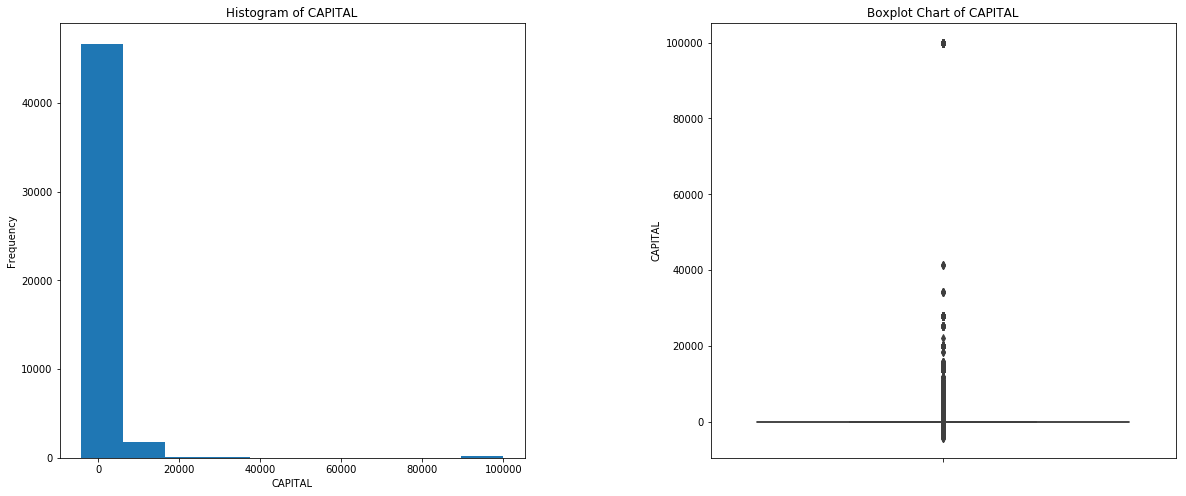

In [11]:
# New columns
# Explore column CAPITAL - made up from Capital Gain - Capital Loss
adults['capital'] = adults['capital-gain'] - adults['capital-loss']
fig_numeric(adults, 'capital')

In [12]:
# Filter dataset
income_large50 = adults[adults['income'] == '>50K']
income_less50 = adults[adults['income'] =='<=50K']

### CAPITAL vs INCOME

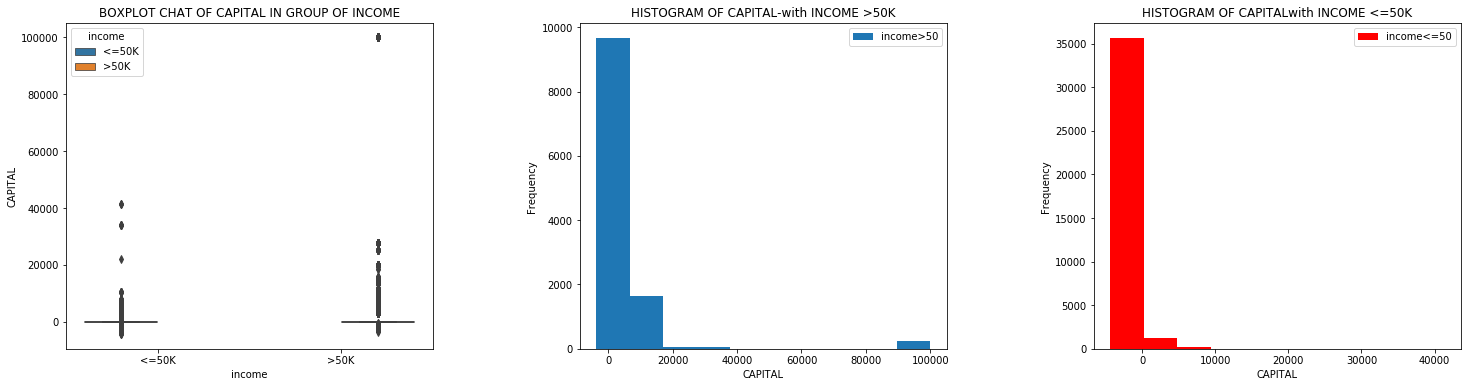

In [13]:
fig_numericVsIncome(adults, "capital", income_large50, income_less50)

## AGE

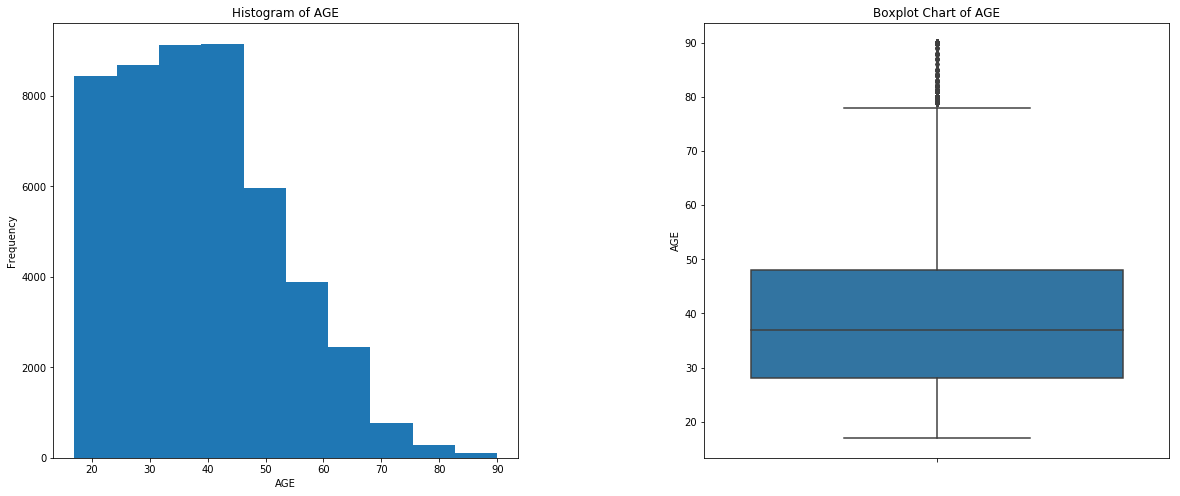

In [14]:
fig_numeric(adults, 'age')

### AGE vs INCOME 

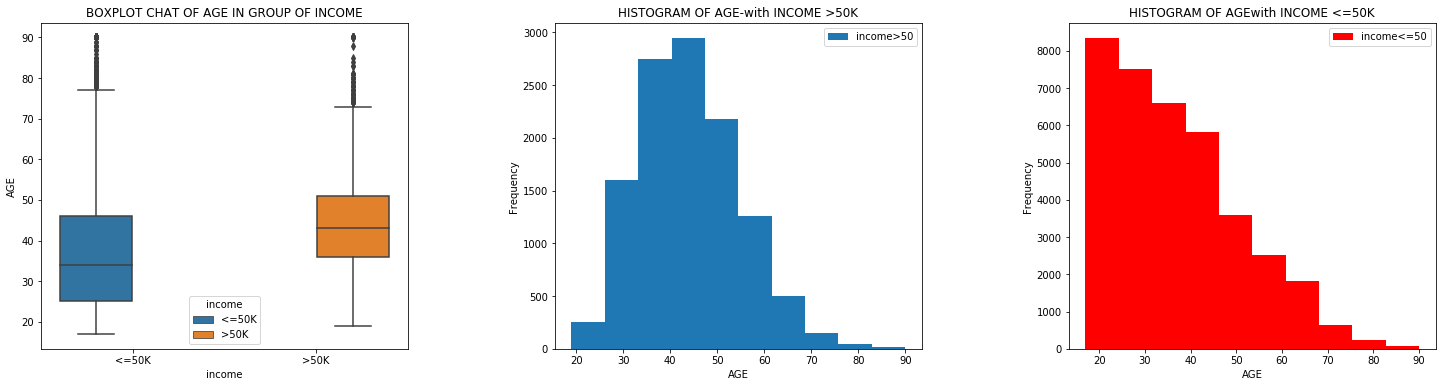

In [15]:
fig_numericVsIncome(adults, "age", income_large50, income_less50)

### AGE vs WORKING HOUR PER WEEK

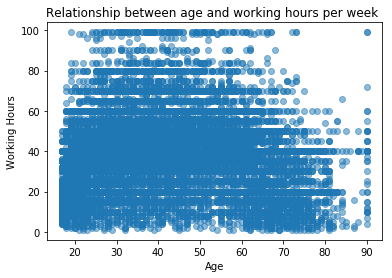

In [16]:
plt.scatter(x = adults['age'], y = adults['hoursperweek'], alpha=0.5)
plt.title('Relationship between age and working hours per week ')
plt.xlabel('Age')
plt.ylabel('Working Hours')
plt.show()

## WORKING HOUR PER WEEK 

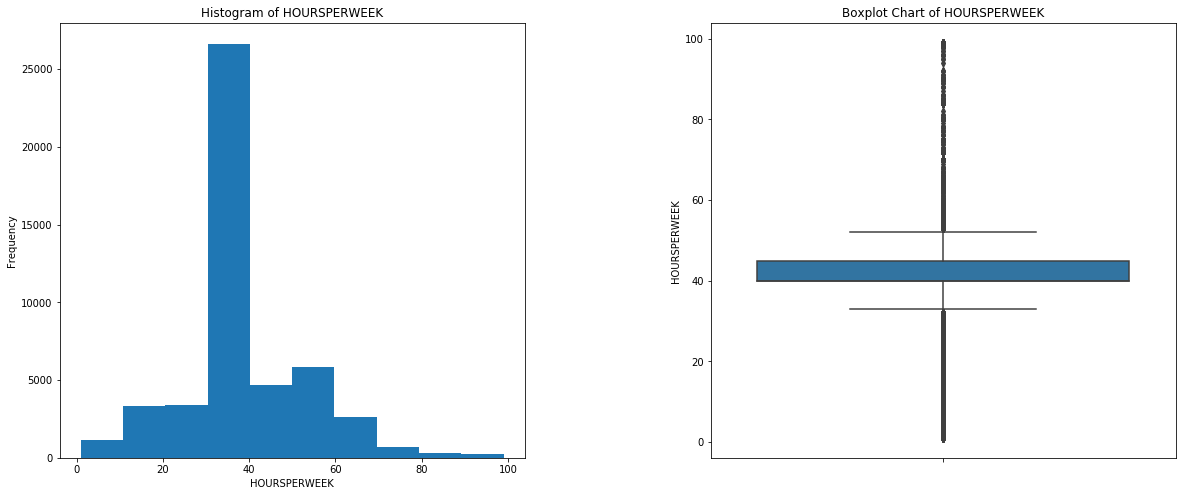

In [17]:
fig_numeric(adults, 'hoursperweek')

### WORKING HOURS vs INCOME 

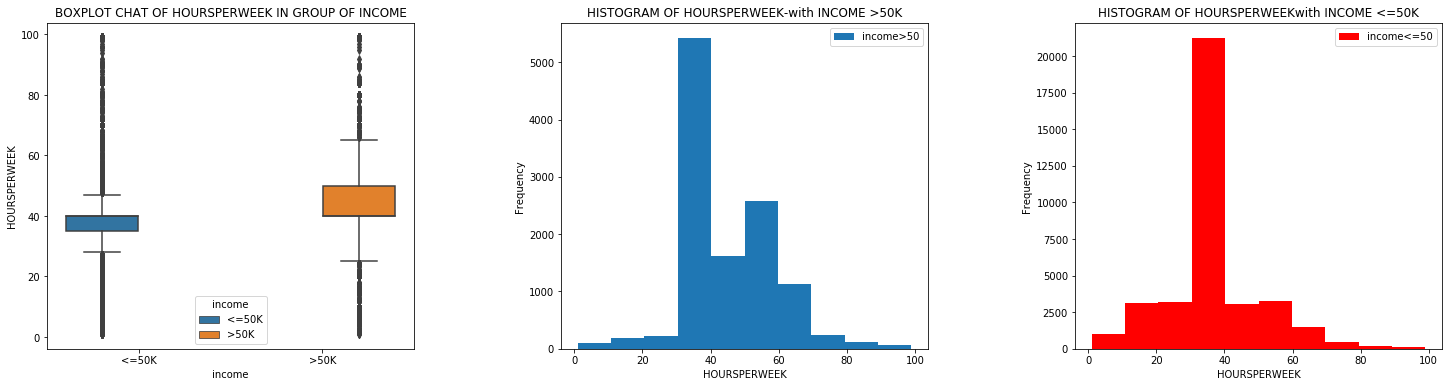

In [18]:
fig_numericVsIncome(adults, 'hoursperweek', income_large50, income_less50)

### WORKCLASS

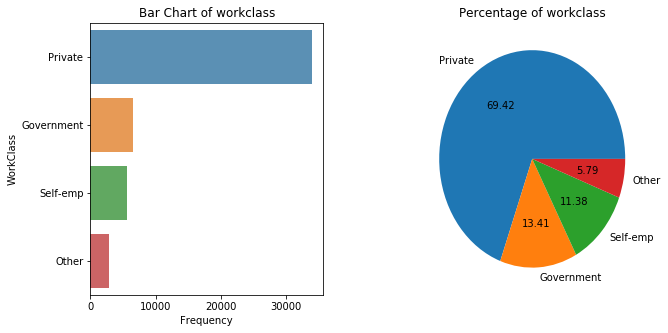

In [19]:
fig_category(adults, "workclass", 'Frequency','WorkClass')

Text(0.5,1,u'Workclass vs Income')

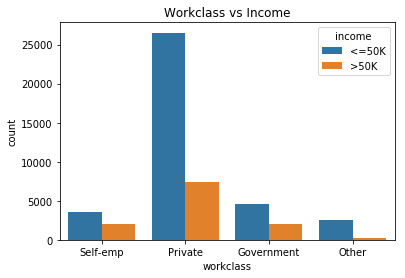

In [20]:
sb.countplot(x="workclass", hue="income", data= adults).set_title("Workclass vs Income")

### WORK CLASS vs SEX and INCOME

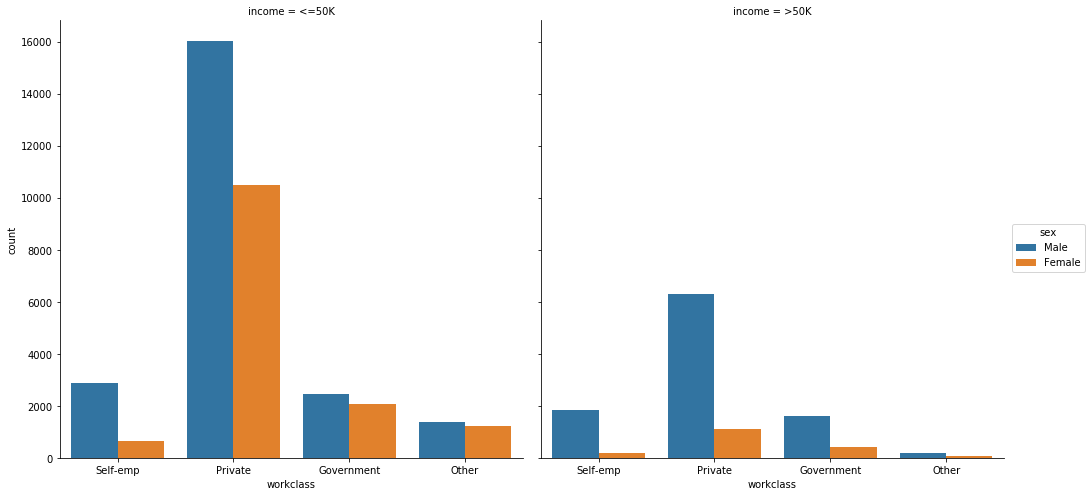

In [21]:
sb.factorplot(x="workclass", hue="sex", col="income", data=adults, kind="count", size= 7)

## EDUCATION 

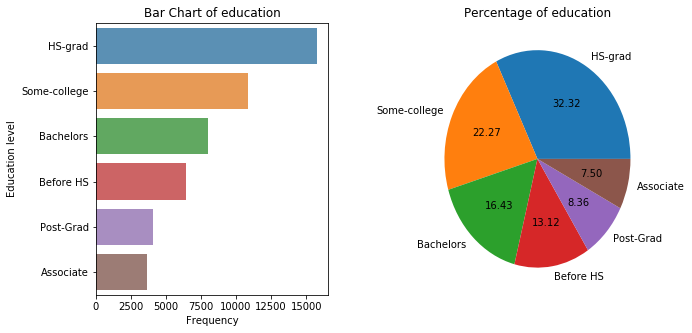

In [22]:
fig_category(adults, "education", 'Frequency','Education level')

### EDUCATION vs INCOME

Text(0.5,1,u'Education level vs Income')

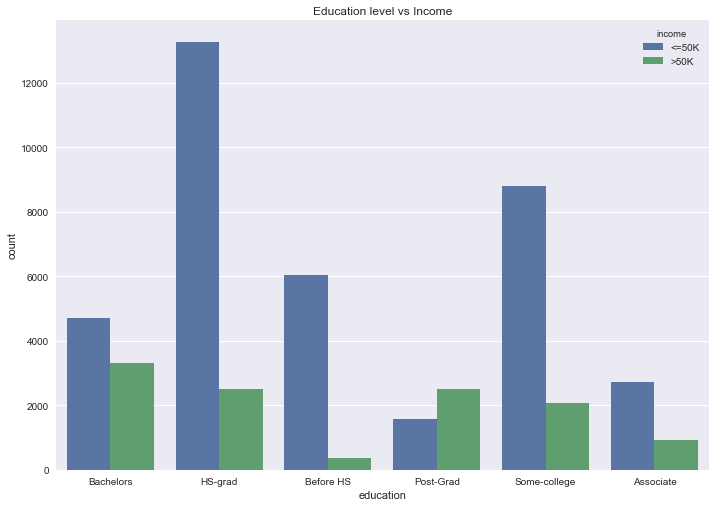

In [23]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.countplot(x="education", hue="income", data= adults).set_title("Education level vs Income")

### EDUCATION , SEX vs INCOME

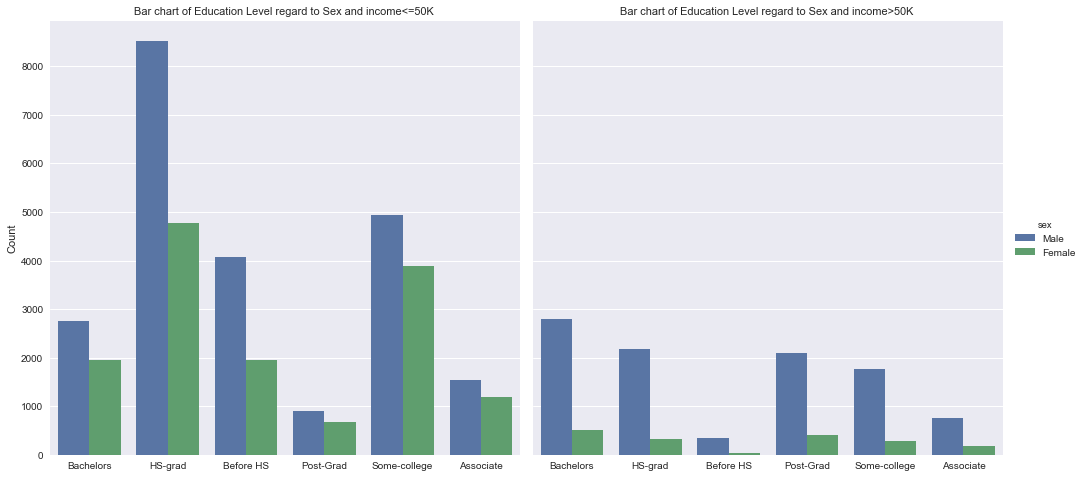

In [24]:
g = sb.factorplot(x="education", hue="sex", col="income", data=adults, kind="count", size= 7)
g.set_axis_labels("", "Count").set_titles("Bar chart of Education Level regard to Sex and {col_var}{col_name} ")

## MARITAL STATUS

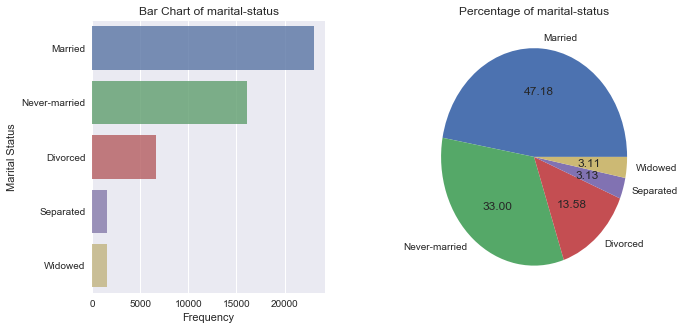

In [25]:
fig_category(adults, "marital-status", 'Frequency','Marital Status')

### MARITAL STATUS vs INCOME

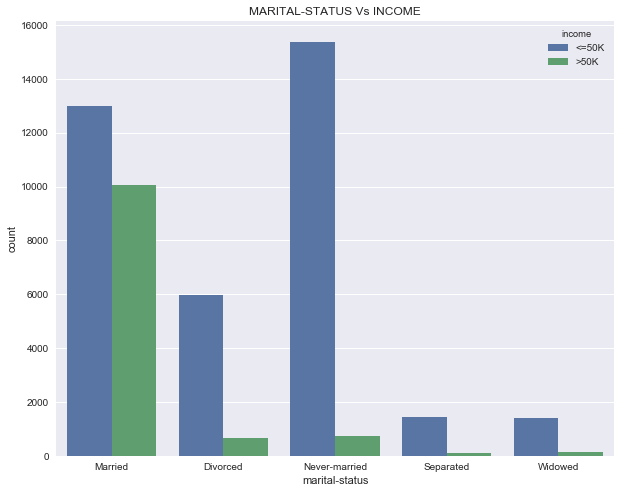

In [26]:
fig_categoryVsIncome_barV(adults, "marital-status")

### EDUCATION, MARITAL STATUS and INCOME

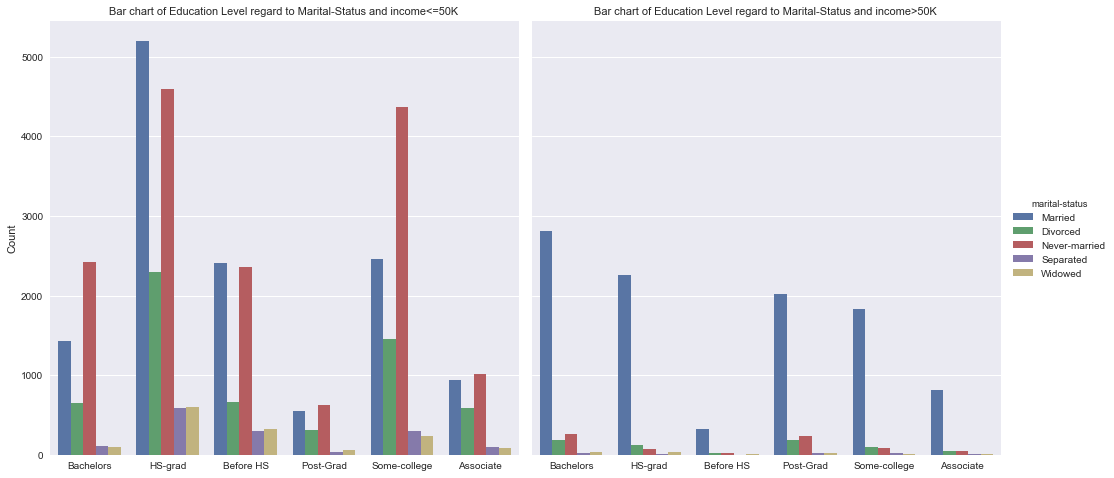

In [27]:
g =sb.factorplot(x="education", hue="marital-status", col="income", data=adults, kind="count", size= 7)
g.set_axis_labels("", "Count").set_titles("Bar chart of Education Level regard to Marital-Status and {col_var}{col_name} ")

### EDUCATION, MARITAL STATUS and WORKCLASS

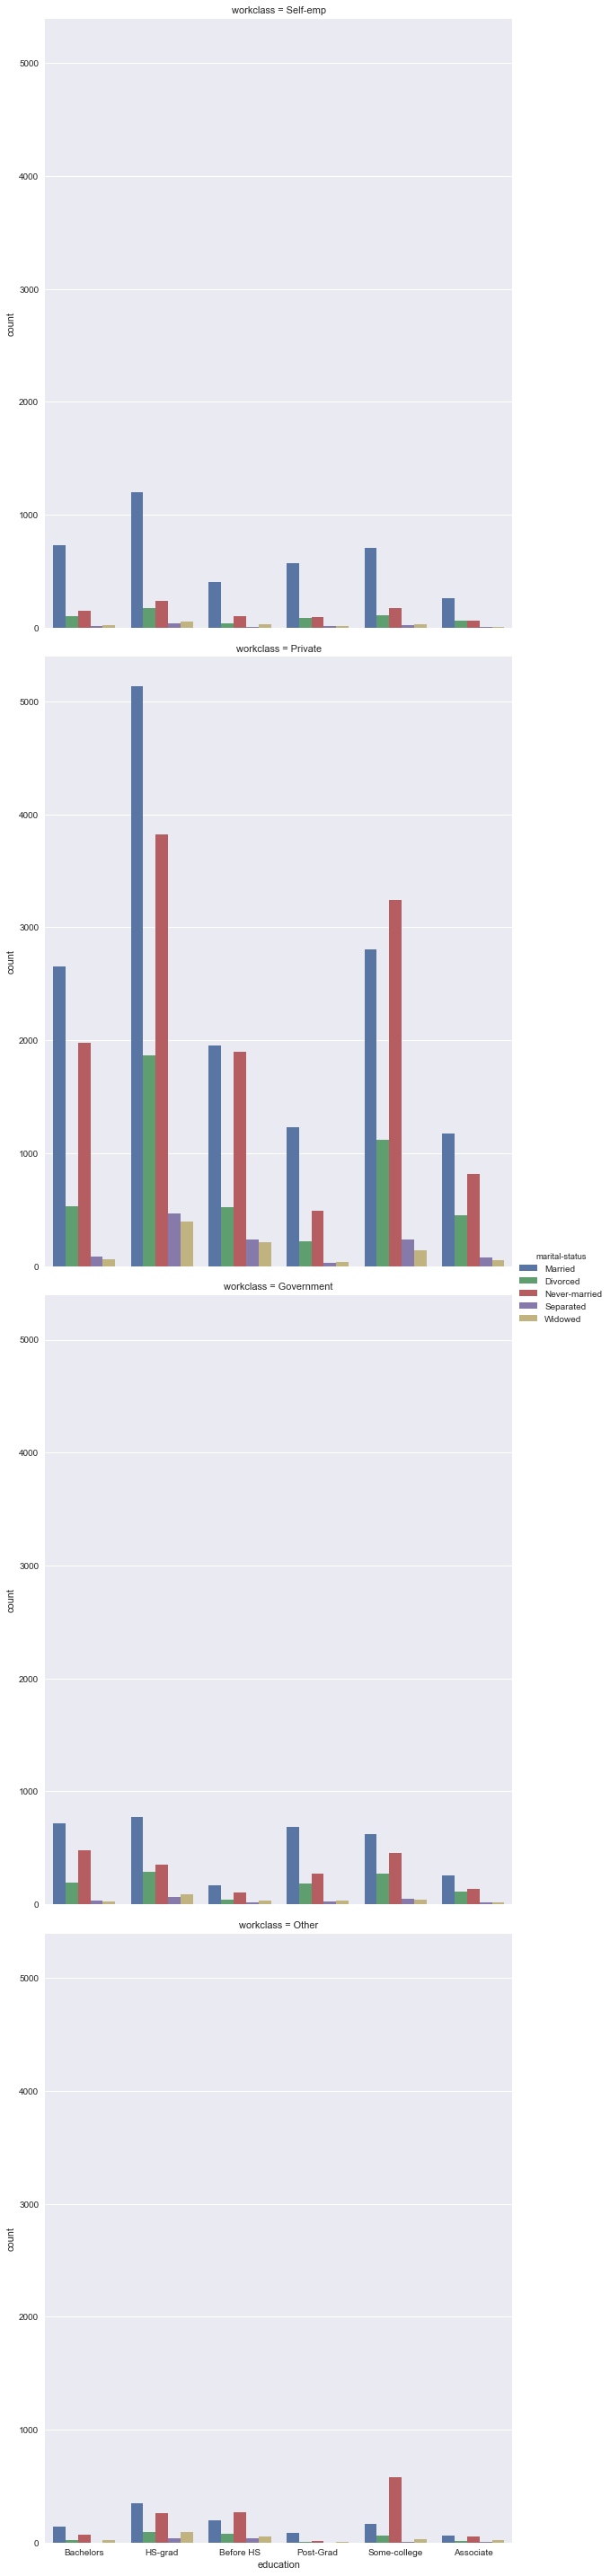

In [28]:
sb.factorplot(x="education", hue="marital-status", row="workclass", data=adults, kind="count", size= 10, aspect=.8)

## OCCUPATION

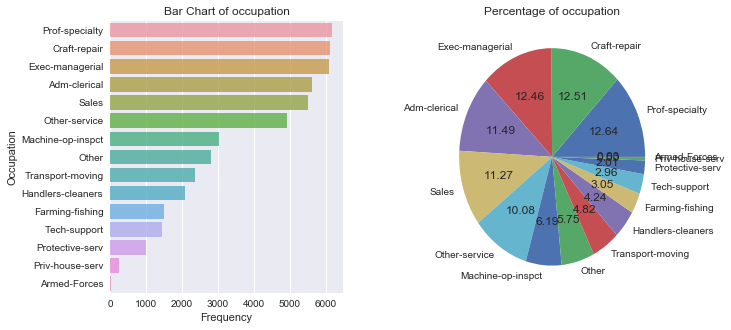

In [29]:
fig_category(adults, "occupation", 'Frequency','Occupation')

### OCCUPATION vs INCOME GROUP

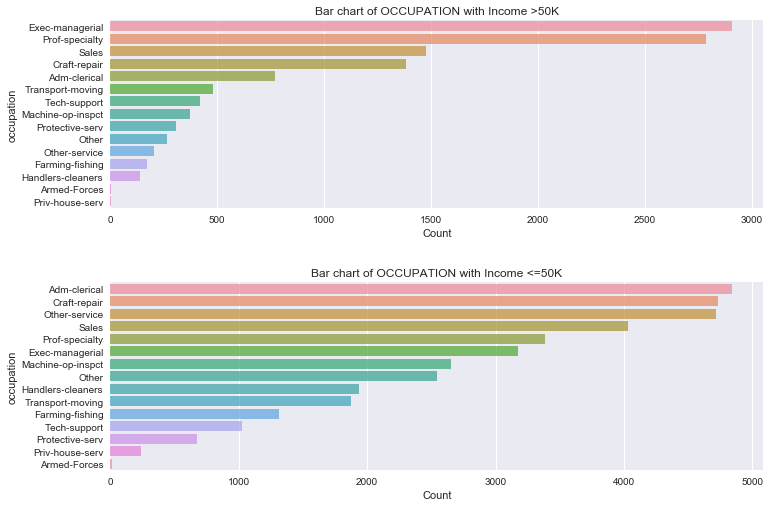

In [30]:
fig_categoryVsIncome_barH(adults, "occupation",income_large50,income_less50 )

## RELATIONSHIP 

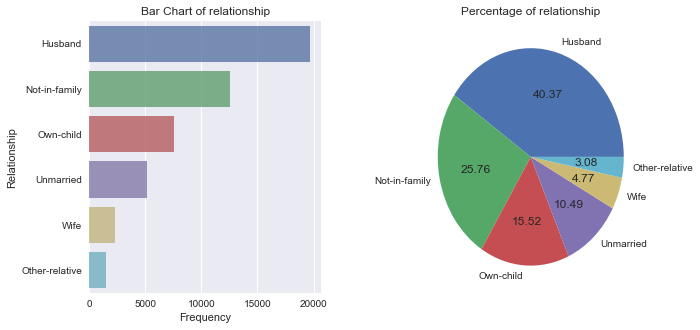

In [31]:
fig_category(adults, "relationship", 'Frequency','Relationship')

### RELATIONSHIP vs INCOME GROUP 

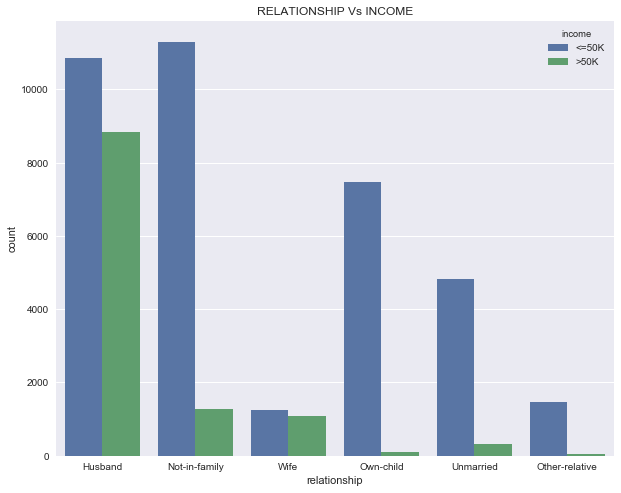

In [32]:
fig_categoryVsIncome_barV(adults, "relationship")

## NATIVE COUNTRY 

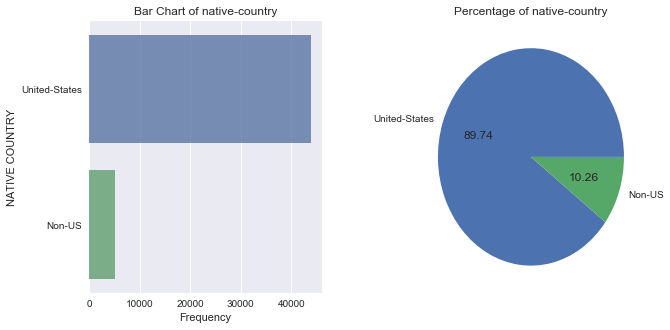

In [33]:
fig_category(adults, "native-country", 'Frequency','NATIVE COUNTRY')

### NATIVE COUNTRY vs INCOME GROUP

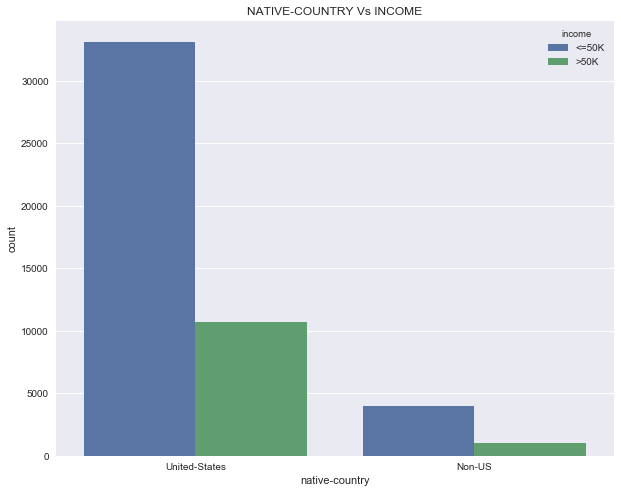

In [34]:
fig_categoryVsIncome_barV(adults, "native-country")

## RACE

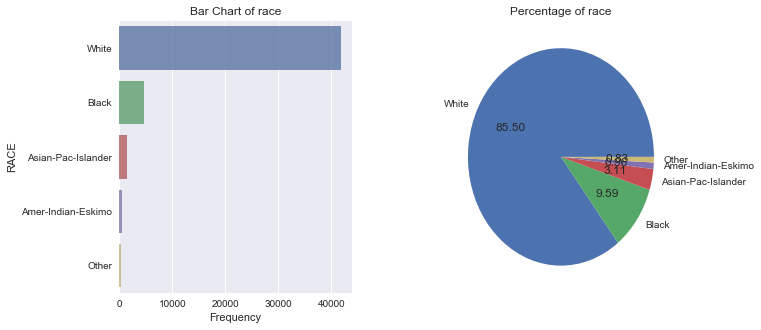

In [35]:
fig_category(adults, "race", 'Frequency','RACE')

### RACE VS INCOME

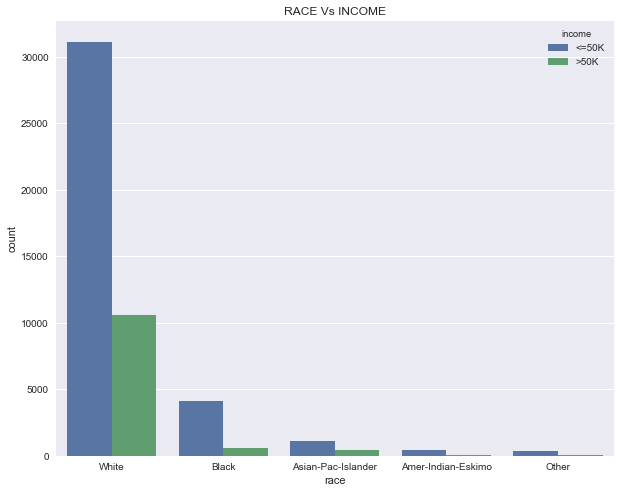

In [36]:
fig_categoryVsIncome_barV(adults, "race")

## SEX

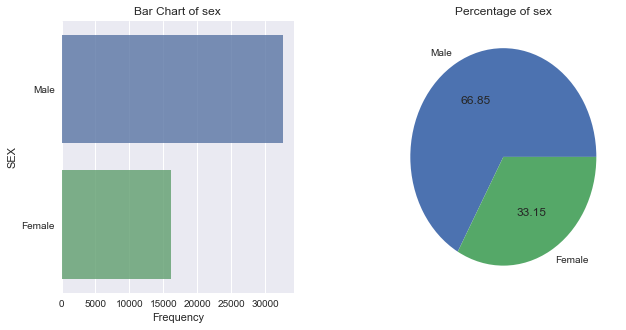

In [37]:
fig_category(adults, "sex", 'Frequency','SEX')

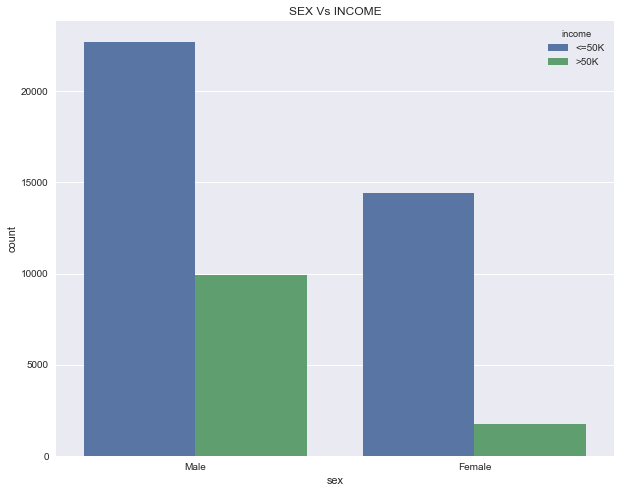

In [38]:
fig_categoryVsIncome_barV(adults, "sex")

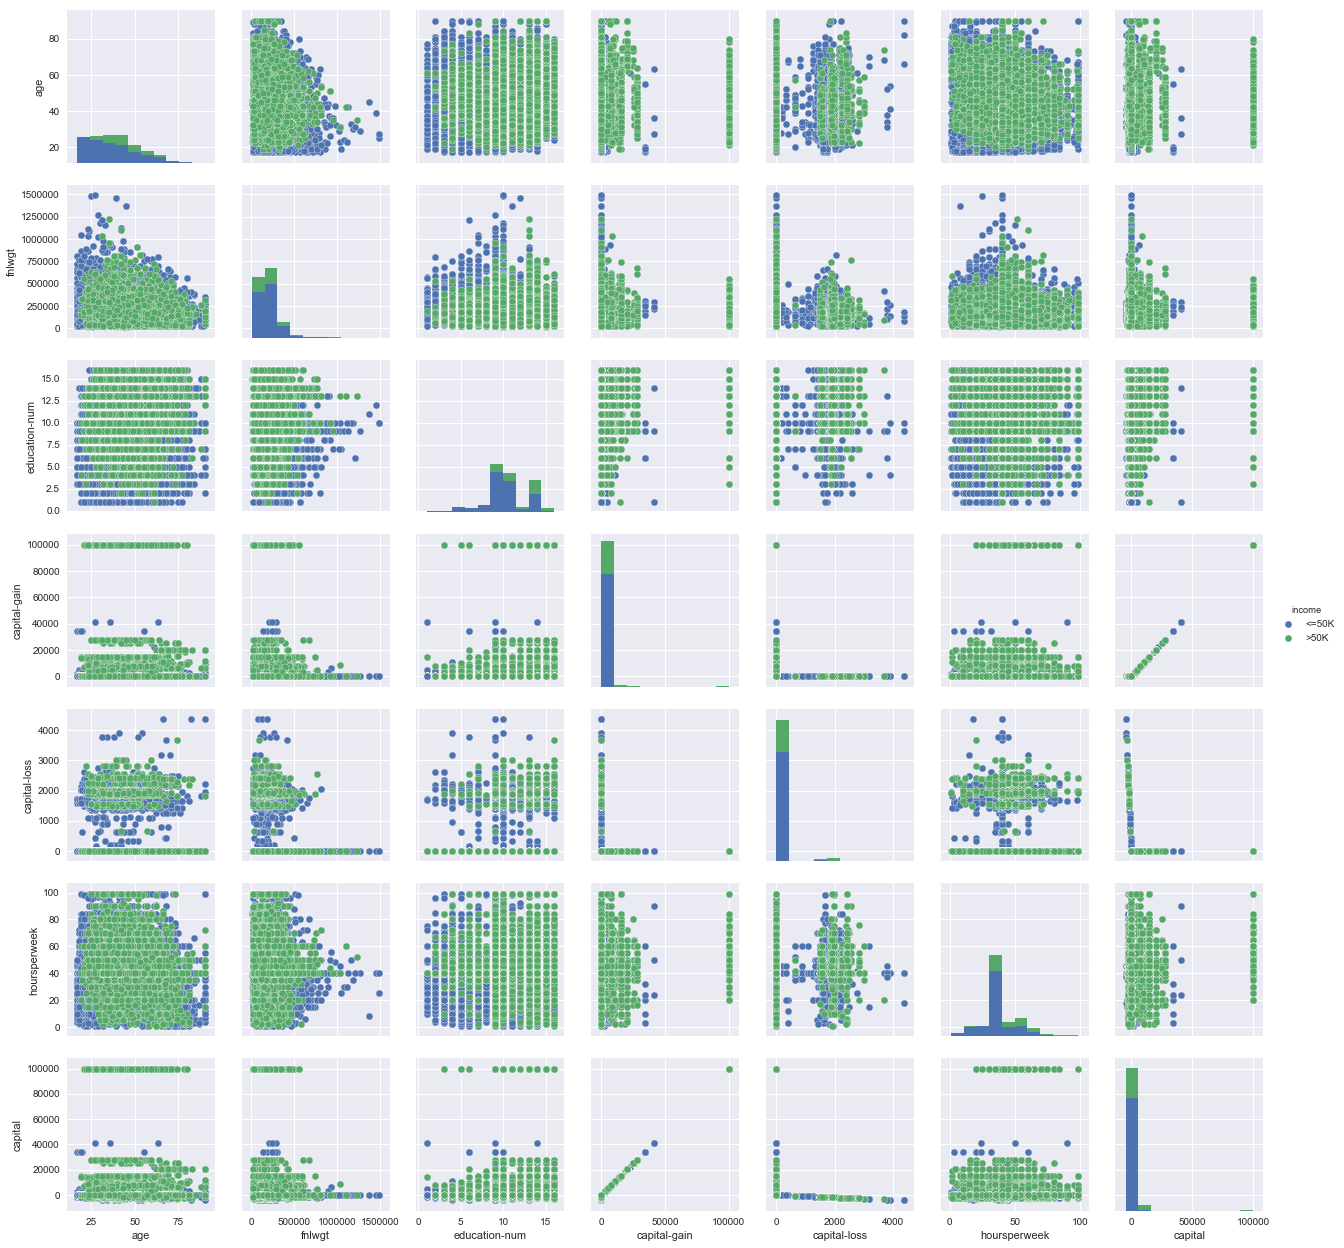

In [39]:
sb.pairplot(adults, hue="income")